## Example: Geometric Seperation with RKHS and the Kernel Method
Seeing how to use the sklearn package with different kernel.

Description: This program first generates some random data in R2, then trains and SVM classifier with the specified kernel (linear, polynomial, or Gaussian).
After training it plots the decision boundary along with the data points. You can change the kernel types by providing the appropriate input when prompted.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


In [9]:
# Generate some example 2D data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)


In [10]:
# Define kernel functions
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, degree=3):
    return (1 + np.dot(x, y)) ** degree

def gaussian_kernel(x, y, sigma=0.5):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * (sigma ** 2)))


In [11]:
# Function to train SVM with given kernel
def train_svm(X, y, kernel='linear'):
    if kernel == 'linear':
        clf = svm.SVC(kernel='linear')
    elif kernel == 'polynomial':
        clf = svm.SVC(kernel='poly', degree=3)
    elif kernel == 'gaussian':
        clf = svm.SVC(kernel='rbf')
    else:
        raise ValueError("Unsupported kernel type")

    clf.fit(X, y)
    return clf


In [12]:
# Function to plot decision boundary and data points
def plot_decision_boundary(X, y, clf):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.title('Decision Boundary with ' + clf.kernel)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


Enter kernel type (linear, polynomial, or gaussian):  gaussian


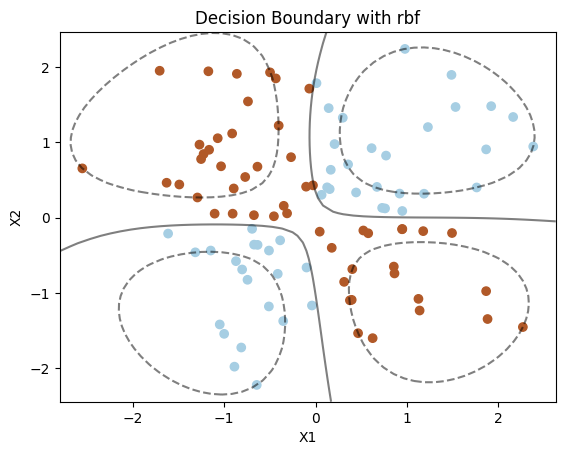

In [13]:
# Main function
if __name__ == "__main__":
    kernel_type = input("Enter kernel type (linear, polynomial, or gaussian): ")

    # Train SVM with selected kernel
    clf = train_svm(X, y, kernel=kernel_type)

    # Plot decision boundary
    plot_decision_boundary(X, y, clf)